#### Họ và tên : Phan Nguyễn Khôi Nguyên
#### MSSSV     : 21068021

In [9]:
#Import thư viện
import numpy as np
import matplotlib.pyplot as plt

## Tạo ngẫu nhiên 1 mảng 2 chiều gồm num_samples hàng và num_features cột. num_samples còn gọi là số mẫu, được tạo ngẫu nhiên trong khoảng 100 đến 200, num_features =2 được gọi là số đặc trưng

In [3]:
# Số hàng (num_samples) trong khoảng từ 100 đến 200
num_samples = np.random.randint(100, 201)

# Số cột (num_features) là 2
num_features = 2

# Tạo mảng 2D ngẫu nhiên kích thước (num_samples, num_features)
mang_ngau_nhien = np.random.rand(num_samples, num_features)

print("Mảng 2D ngẫu nhiên:")
print(mang_ngau_nhien)

Mảng 2D ngẫu nhiên:
[[6.42446155e-01 6.67456132e-01]
 [4.57655263e-01 2.46990015e-01]
 [7.73465645e-01 7.77607902e-01]
 [4.28592151e-03 1.03524350e-01]
 [8.06919868e-01 2.82086449e-01]
 [2.85484484e-01 6.85485006e-01]
 [2.68783377e-02 5.03283898e-01]
 [9.91824720e-01 7.84141650e-01]
 [6.54205185e-01 5.74498344e-01]
 [3.88792901e-01 1.98055721e-01]
 [6.82857163e-01 5.50096675e-01]
 [4.67189718e-01 5.05300928e-01]
 [3.01688177e-01 1.60339482e-01]
 [1.77150833e-01 1.52761459e-01]
 [7.69642544e-01 3.47340202e-01]
 [4.33630419e-01 8.15155325e-02]
 [9.81371082e-01 2.15021151e-01]
 [4.19003297e-01 3.13764327e-01]
 [9.58376928e-01 8.76184842e-01]
 [9.85111762e-01 9.08290312e-01]
 [3.17185375e-01 6.02748925e-01]
 [7.44155209e-01 9.64478601e-01]
 [7.33767487e-01 8.71001145e-01]
 [3.34850848e-01 5.13670730e-02]
 [2.80009867e-01 6.48342057e-01]
 [2.55758019e-01 2.77663356e-01]
 [2.96041138e-01 8.01438757e-01]
 [2.06354448e-01 6.51939934e-01]
 [9.80895363e-01 1.87075372e-01]
 [2.50695670e-02 3.7489

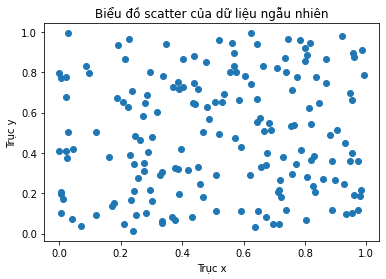

In [14]:
# Lấy cột đầu tiên làm trục X và cột thứ hai làm trục Y
X = mang_ngau_nhien[:, 0]
Y = mang_ngau_nhien[:, 1]

# Vẽ biểu đồ scatter
plt.scatter(X, Y)
plt.xlabel('Trục x')
plt.ylabel('Trục y')
plt.title('Biểu đồ scatter của dữ liệu ngẫu nhiên')
plt.show()

Đầu vào: Dữ liệu X và số lượng cluster cần tìm K.

Đầu ra: Các center M và label vector cho từng điểm dữ liệu Y.
1. Chọn K điểm bất kỳ làm các center ban đầu.
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
4. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã
được gán vào cluster đó sau bước 2.
5. Quay lại bước 2.

In [7]:
def k_means(X, K):
    # câu 1 Chọn K điểm bất kỳ làm các center ban đầu.
    centers = X[np.random.choice(len(X), K, replace=False)]
    while True:
        # câu 2
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centers, axis=2), axis=1)
        # Sao chép các centers cũ để so sánh sau này
        old_centers = np.copy(centers)
        # câu 4
        for i in range(K):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centers[i] = np.mean(cluster_points, axis=0)
        # câu 3
        if np.array_equal(old_centers, centers):
            break
    return centers, labels


# Số lượng cluster cần tìm
K = 3
# Áp dụng thuật toán K-means
centers, labels = k_means(mang_ngau_nhien, K)

print("Centers:", centers)
print("Labels:", labels)

Centers: [[0.51284344 0.78062844]
 [0.79799539 0.31874702]
 [0.24193716 0.25547216]]
Labels: [0 2 0 2 1 0 2 0 0 2 1 0 2 2 1 2 1 2 0 0 0 0 0 2 0 2 0 0 1 2 0 2 0 1 1 1 0
 2 0 0 0 0 0 0 2 2 0 2 1 1 1 0 0 2 2 1 0 1 2 1 2 2 0 1 2 0 0 0 0 2 1 1 0 1
 1 2 2 0 1 0 1 0 1 0 2 0 0 1 0 2 1 1 1 1 0 0 1 1 0 0 2 1 0 1 0 1 0 2 0 0 2
 0 2 2 2 0 1 0 1 1 0 0 1 2 2 0 2 0 1 1 2 0 1 2 2 2 2 0 0 2 2 2 0 2 1 0 1 0
 0 1 1 0 1 1 1 1 2 2 0 0 1 2 1 2 1 0 0 2 0 1 0 2 0 1 0 1 1]


###  K-Means Clustering

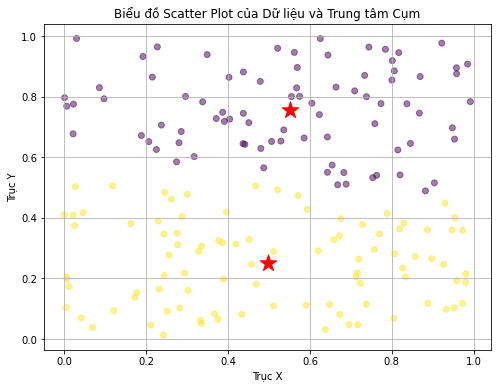

In [12]:
from sklearn.cluster import KMeans 
kmeans = KMeans (n_clusters=2) #Tạo một đối tượng KMeans với n_clusters=2, tức là chúng ta muốn tìm 2 cụm từ dữ liệu.
kmeans.fit(mang_ngau_nhien) #Huấn luyện mô hình
# Trích xuất các trung tâm của các cụm và nhãn của mỗi mẫu 
centroids=kmeans.cluster_centers_  #Đây là vị trí trung tâm của 2 cụm dữ liệu.
labels = kmeans.labels_   #Đây là nhãn (label) của mỗi điểm dữ liệu, thể hiện nó thuộc về cụm nào.
# Vẽ biểu đồ scatter plot của dữ liệu và các trung tâm cụm
plt.figure(figsize=(8, 6))
plt.scatter(mang_ngau_nhien[:, 0], mang_ngau_nhien[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter (centroids [:, 0], centroids[:, 1], marker='*', c='red', s=300)
plt.title('Biểu đồ Scatter Plot của Dữ liệu và Trung tâm Cụm')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.show()


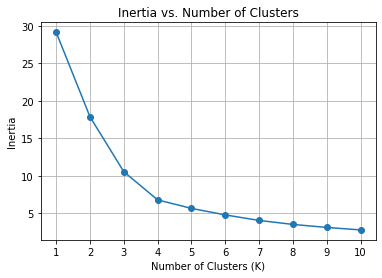

In [28]:
from sklearn.cluster import KMeans 
k_values = range(1, 11)
# Calculate inertia for each K value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(mang_ngau_nhien)
    inertia_values.append(kmeans.inertia_)
# Plot inertia values for different K values 
plt.plot(k_values, inertia_values, marker='o') 
plt.title('Inertia vs. Number of Clusters') 
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Dựa vào đồ thị "Inertia vs. Number of Clusters", chúng ta có thể xác định số lượng cluster (K) thích hợp bằng cách tìm điểm "khuỷu tay" (elbow point) của đường cong.

Điểm khuỷu tay là điểm mà sau đó, việc tăng thêm số lượng cluster không làm giảm inertia (độ đo của sự khác biệt giữa các điểm dữ liệu và trung tâm của cluster tương ứng) một cách đáng kể.

=> Chọn k = 3

In [31]:
newsample =[[0.2,0.2]]
newlable = kmeans.predict(newsample)
print(newlable) #điều đó có nghĩa là điểm dữ liệu mới newsample = [0.2, 0.2] được gán vào cụm 9

[9]
